In [106]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [107]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [109]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)
train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [110]:
train.isnull().sum()

Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [111]:
from icecream import ic
ob_col = ['TypeofContact', 'Occupation',
          'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

train.replace('Fe Male', 'Female')
ic(train['Gender'])

for col, dtype in train.dtypes.items():
    if dtype == 'object':
        # 문자형 칼럼의 경우 'Unknown'을 채워줍니다.
        value = 'Unknown'
        train.loc[:,col] = train[col].fillna(value)
        test.loc[:,col] = test[col].fillna(value)
    elif dtype == int or dtype == float:
        # 수치형 칼럼의 경우 0을 채워줍니다.
        value = 0
        train.loc[:,col] = train[col].fillna(value)
        test.loc[:,col] = test[col].fillna(value)
print(train.isna().sum())

ic| train['Gender']: 0         Male
                     1       Female
                     2         Male
                     3         Male
                     4         Male
                              ...  
                     1950      Male
                     1951    Female
                     1952    Female
                     1953    Female
                     1954      Male
                     Name: Gender, Length: 1955, dtype: object


Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64


In [112]:
train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,34.0,Self Enquiry,3,0.0,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,45.0,Company Invited,1,0.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,0.0,0
3,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [113]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train['TypeofContact'])
encoder.transform(train['TypeofContact'])

for col in ob_col:
    encoder = LabelEncoder()
    encoder.fit(train[col])
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])
ic(train)
ic(test)

ic| train:        Age  TypeofContact  CityTier  DurationOfPitch  Occupation  Gender  \
           0     28.0              0         1             10.0           3       2   
           1     34.0              1         3              0.0           3       1   
           2     45.0              0         1              0.0           2       2   
           3     29.0              0         1              7.0           3       2   
           4     42.0              1         3              6.0           2       2   
           ...    ...            ...       ...              ...         ...     ...   
           1950  28.0              1         1             10.0           3       2   
           1951  41.0              1         3              8.0           2       1   
           1952  38.0              0         3             28.0           3       1   
           1953  28.0              1         3             30.0           3       1   
           1954  22.0              0       

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,32.0,0,3,0.0,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,46.0,1,2,11.0,3,2,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,26.0,1,1,9.0,3,2,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [114]:
# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()
# 설명변수 및 목표변수 분리
x = train[train.columns.difference(['ProdTaken'])]
y = train['ProdTaken']
# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)
ic(x_scaled)

ic| x_scaled: array([[-0.63711243, -0.70602535, -0.76613788, ..., -0.66237851,
                      -0.92348513, -1.54782398],
                     [-0.1381254 ,  1.49537745,  0.2812744 , ...,  0.54110661,
                      -0.13612646,  0.61514663],
                     [ 0.77668417, -0.70602535,  0.2812744 , ...,  0.54110661,
                      -0.13612646, -1.54782398],
                     ...,
                     [ 0.19453263,  1.49537745, -0.76613788, ..., -0.66237851,
                      -0.92348513, -1.54782398],
                     [-0.63711243,  1.49537745,  0.2812744 , ..., -0.66237851,
                      -0.13612646,  0.61514663],
                     [-1.13609946, -0.70602535, -0.76613788, ..., -0.66237851,
                      -0.92348513, -1.54782398]])


array([[-0.63711243, -0.70602535, -0.76613788, ..., -0.66237851,
        -0.92348513, -1.54782398],
       [-0.1381254 ,  1.49537745,  0.2812744 , ...,  0.54110661,
        -0.13612646,  0.61514663],
       [ 0.77668417, -0.70602535,  0.2812744 , ...,  0.54110661,
        -0.13612646, -1.54782398],
       ...,
       [ 0.19453263,  1.49537745, -0.76613788, ..., -0.66237851,
        -0.92348513, -1.54782398],
       [-0.63711243,  1.49537745,  0.2812744 , ..., -0.66237851,
        -0.13612646,  0.61514663],
       [-1.13609946, -0.70602535, -0.76613788, ..., -0.66237851,
        -0.92348513, -1.54782398]])

In [115]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1234)
model.fit(x_scaled, y)
train_score_before = model.score(x_scaled, y).round(3)
print(f"학습 데이터셋 정확도: {train_score_before}")


학습 데이터셋 정확도: 1.0


In [116]:
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])
# Test Data 설명력
test_score_before = model.score(test, prediction).round(3)
print(f"테스트 데이터셋 정확도: {test_score_before}")

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[0 1 1 1 1 1 0 1 1 1]
테스트 데이터셋 정확도: 1.0


In [117]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    prediction = model.predict(test)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, prediction).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

In [118]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('./figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

In [119]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        prediction = model.predict(test)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, prediction))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [120]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        prediction = model.predict(test)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, prediction))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [121]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        prediction = model.predict(test)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, prediction))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

In [122]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        pre = model.predict(test)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, pre))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))


In [139]:
def model_final(algorithm, algorithm_name, x_train, y_train, x_test, n_estimator, n_depth):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    pre = model.predict(test)
    # 모델 저장
    model_path = './model/'
    model_filename = 'wine_classification_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, pre)
    y_pred = model.predict(x_test)
    sample_submission['ProdTaken'] = prediction
    ic(sample_submission.head())
    sample_submission.to_csv('submission3.csv',index = False)
    print(f"Accuracy: {accuracy_score(pre, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(pre, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(pre, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(pre, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, pre,
                         include_values = True,
                         display_labels = ['Red', 'White'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.savefig('./figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    

In [124]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

In [125]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_scaled,
                                                          y,
                                                          test)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 1.0


    n_estimators  TrainScore  TestScore
0              5      0.9801        1.0
1             10      0.9908        1.0
2             15      0.9974        1.0
3             20      0.9974        1.0
4             25      0.9990        1.0
5             30      0.9980        1.0
6             35      0.9995        1.0
7             40      0.9995        1.0
8             45      0.9995        1.0
9             50      0.9995        1.0
10            55      1.0000        1.0
11            60      1.0000        1.0
12            65      1.0000        1.0
13            70      1.0000        1.0
14            75      1.0000        1.0
15            80      1.0000        1.0
16            85      1.0000        1.0
17            90      1.0000        1.0
18            95      1.0000        1.0
19           100      1.0000        1.0
20           105      1.0000        1.0
21           110      1.0000        1.0
22           115      1.0000        1.0
23           120      1.0000        1.0


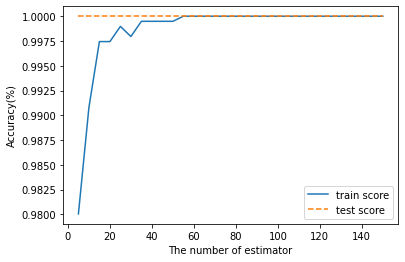

In [126]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 x_scaled, y, test, 
                 n_estimator_min, n_estimator_max)

In [127]:
n_estimator = 30

    depth  TrainScore  TestScore
0       1      0.8041        1.0
1       2      0.8041        1.0
2       3      0.8153        1.0
3       4      0.8338        1.0
4       5      0.8471        1.0
5       6      0.8655        1.0
6       7      0.8931        1.0
7       8      0.9238        1.0
8       9      0.9478        1.0
9      10      0.9611        1.0
10     11      0.9780        1.0
11     12      0.9898        1.0
12     13      0.9934        1.0
13     14      0.9969        1.0
14     15      0.9985        1.0
15     16      0.9990        1.0
16     17      0.9985        1.0
17     18      0.9985        1.0
18     19      0.9980        1.0
19     20      0.9985        1.0


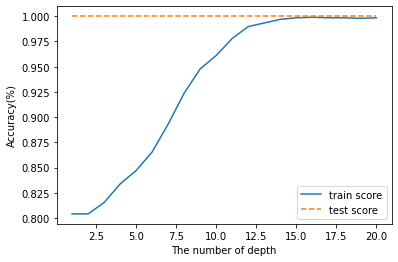

In [128]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                x_scaled, y, test,
                depth_min, depth_max, 30)

In [129]:
n_depth = 15

    min_samples_split  TrainScore  TestScore
0                   2      0.9985        1.0
1                   4      0.9908        1.0
2                   6      0.9714        1.0
3                   8      0.9509        1.0
4                  10      0.9391        1.0
5                  12      0.9248        1.0
6                  14      0.9125        1.0
7                  16      0.9084        1.0
8                  18      0.9008        1.0
9                  20      0.8921        1.0
10                 22      0.8910        1.0
11                 24      0.8885        1.0
12                 26      0.8813        1.0
13                 28      0.8783        1.0
14                 30      0.8752        1.0
15                 32      0.8721        1.0
16                 34      0.8737        1.0
17                 36      0.8650        1.0
18                 38      0.8619        1.0
19                 40      0.8655        1.0
20                 42      0.8578        1.0
21        

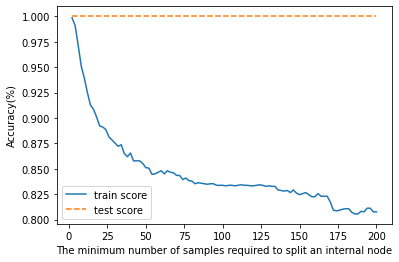

In [130]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x_scaled, y, test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [131]:
n_split = 2

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9739        1.0
1                  4      0.9115        1.0
2                  6      0.8895        1.0
3                  8      0.8747        1.0
4                 10      0.8670        1.0
5                 12      0.8563        1.0
6                 14      0.8604        1.0
7                 16      0.8445        1.0
8                 18      0.8435        1.0
9                 20      0.8358        1.0
10                22      0.8384        1.0
11                24      0.8343        1.0
12                26      0.8343        1.0
13                28      0.8353        1.0
14                30      0.8312        1.0
15                32      0.8307        1.0
16                34      0.8327        1.0
17                36      0.8322        1.0
18                38      0.8317        1.0
19                40      0.8322        1.0
20                42      0.8312        1.0
21                44      0.8261

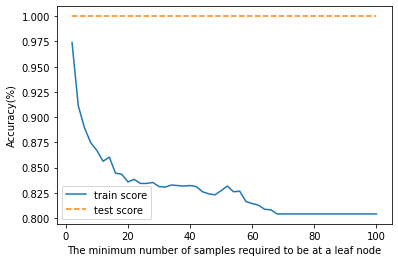

In [132]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x_scaled, y, test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

ic| sample_submission.head():    id  ProdTaken
                              0   1          0
                              1   2          1
                              2   3          1
                              3   4          1
                              4   5          

최종 모델 저장 완료! 파일 경로: ./model/wine_classification_rfc.pkl



1


Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000


<Figure size 2160x2160 with 0 Axes>

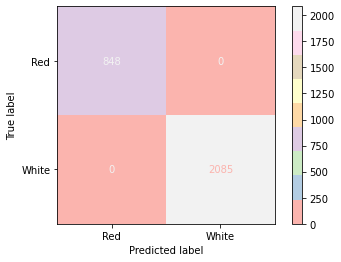

In [140]:
model_final(algorithm, algorithm_name,
            x_scaled, y, test,
            n_estimator, n_depth)